# testing different models for accuracy

In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import scipy as sp
from joblib import dump
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("cs1_part3_res.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Columns: 229 entries, ms_subclass to sale_condition_Partial
dtypes: float64(38), int64(191)
memory usage: 5.1 MB


# lasso

In [4]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
lasso_model = Lasso()

In [7]:
lasso_model.fit(X_train,y_train)

Lasso()

In [8]:
pred_test_lasso = lasso_model.predict(X_test)

In [9]:
pred_test_lasso

array([12.02222179, 12.02222179, 12.02222179, 12.02222179, 12.02222179,
       12.02222179, 12.02222179, 12.02222179, 12.02222179, 12.02222179,
       12.02222179, 12.02222179, 12.02222179, 12.02222179, 12.02222179,
       12.02222179, 12.02222179, 12.02222179, 12.02222179, 12.02222179,
       12.02222179, 12.02222179, 12.02222179, 12.02222179, 12.02222179,
       12.02222179, 12.02222179, 12.02222179, 12.02222179, 12.02222179,
       12.02222179, 12.02222179, 12.02222179, 12.02222179, 12.02222179,
       12.02222179, 12.02222179, 12.02222179, 12.02222179, 12.02222179,
       12.02222179, 12.02222179, 12.02222179, 12.02222179, 12.02222179,
       12.02222179, 12.02222179, 12.02222179, 12.02222179, 12.02222179,
       12.02222179, 12.02222179, 12.02222179, 12.02222179, 12.02222179,
       12.02222179, 12.02222179, 12.02222179, 12.02222179, 12.02222179,
       12.02222179, 12.02222179, 12.02222179, 12.02222179, 12.02222179,
       12.02222179, 12.02222179, 12.02222179, 12.02222179, 12.02

In [10]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [11]:
MAE_Lasso

0.3192907490512503

In [12]:
MSE_Lasso

0.1611623292495359

In [13]:
RMSE_Lasso

0.4014502824130728

In [14]:
def MAPE(y_test,pred_test_lasso):
    mape = np.mean(np.abs((y_test - pred_test_lasso)/y_test))*100
    return mape

In [15]:
LR_MAPElasso= MAPE(y_test,pred_test_lasso)

In [16]:
print("lassocv MAPE: ",LR_MAPElasso)

lassocv MAPE:  2.6684416799011013


In [17]:
accuracy1= round(r2_score(y_test, pred_test_lasso), 2)
accuracy1= accuracy1 * 100
accuracy1

-0.0

# lasso cv

In [18]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
lasso_model = LassoCV()

In [21]:
lasso_model.fit(X_train,y_train)

LassoCV()

In [22]:
pred_test_lasso = lasso_model.predict(X_test)

In [23]:
pred_test_lasso

array([12.89268663, 12.10161632, 11.90327546, 11.69216677, 11.46732851,
       12.04391217, 11.72456561, 12.57290926, 11.96662436, 11.86368322,
       11.87422117, 11.74827389, 11.8974422 , 11.75981205, 12.91499035,
       11.79941107, 13.22257744, 11.82136005, 12.31044993, 12.72483422,
       12.10800742, 12.27204323, 12.6100946 , 12.2529303 , 11.93867711,
       12.10509659, 12.15702254, 12.66741684, 11.70936895, 11.5768436 ,
       12.01457095, 11.17877172, 11.68939231, 11.66547753, 12.01348359,
       11.85087699, 12.10689075, 11.75264283, 12.49452436, 11.87161241,
       11.97308479, 11.76335453, 12.68180358, 12.14904541, 12.64707091,
       12.16506677, 11.80964424, 11.68609533, 11.62788254, 12.10700842,
       11.83190931, 11.8047977 , 12.05934387, 10.97032793, 12.51969636,
       11.701717  , 11.94123927, 12.59376817, 11.49373702, 12.07230859,
       12.22080504, 11.68757571, 11.15951356, 12.17223235, 11.32472769,
       12.27808357, 12.1814624 , 12.04937479, 11.61298397, 11.66

In [24]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [25]:
MAE_Lasso

0.07743678065890326

In [26]:
MSE_Lasso

0.011858468848776192

In [27]:
RMSE_Lasso

0.10889659704865066

In [28]:
def MAPE(y_test,pred_test_lasso):
    mape = np.mean(np.abs((y_test - pred_test_lasso)/y_test))*100
    return mape

In [29]:
LR_MAPElassocv= MAPE(y_test,pred_test_lasso)

In [30]:
print("lassocv MAPE: ",LR_MAPElassocv)

lassocv MAPE:  0.6487279177309184


In [31]:
print("Best alpha using built-in LassoCV: %f" % lasso_model.alpha_)
print("Best score using built-in LassoCV: %f" %lasso_model.score(X,y))
coef = pd.Series(lasso_model.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.003068
Best score using built-in LassoCV: -2212950.803110


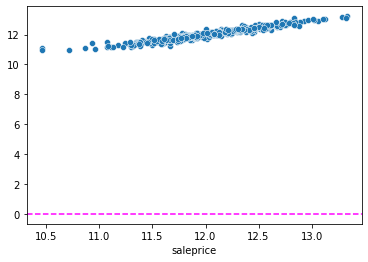

In [32]:
sns.scatterplot(x=y_test,y=pred_test_lasso)
plt.axhline(y=0,color='magenta',linestyle='--')

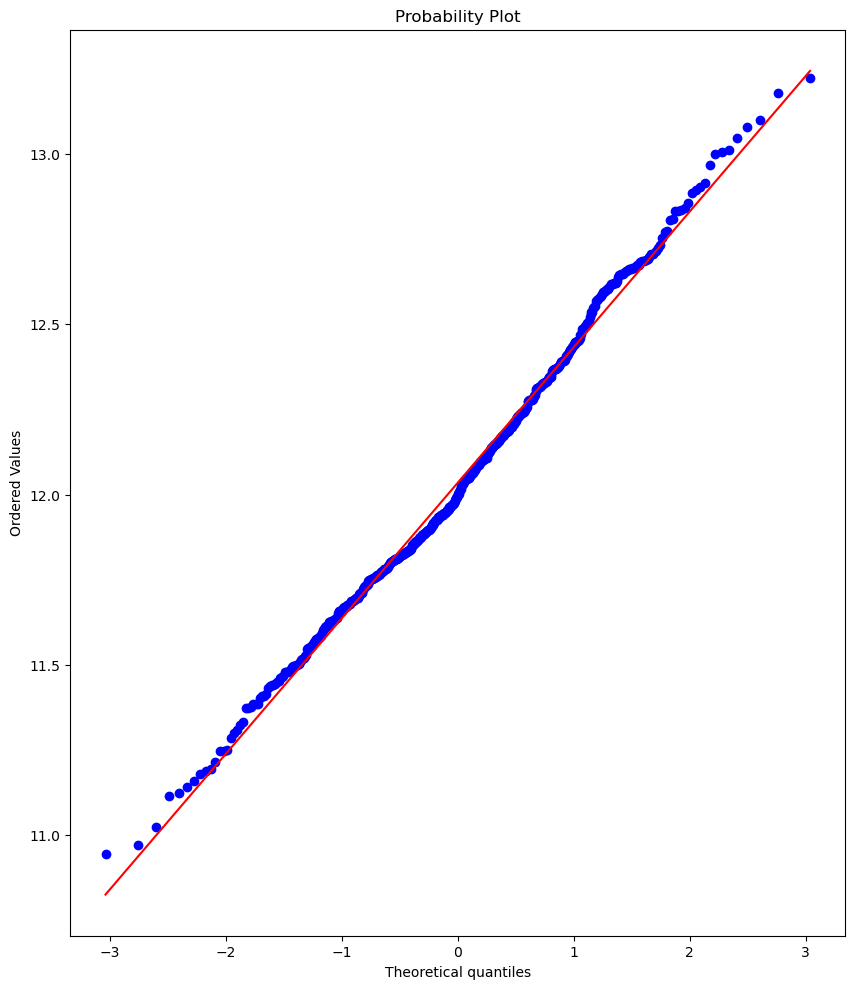

In [33]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_test_lasso,plot=ax)

In [34]:
100*RMSE_Lasso/df['saleprice'].mean()

0.9060463622432311

In [35]:
accuracy2= round(r2_score(y_test, pred_test_lasso), 2)
accuracy2= accuracy2 * 100
accuracy2

93.0

# linear regression

In [36]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
linear_model = LinearRegression()

In [39]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [40]:
pred_linear_model = linear_model.predict(X_test)

In [41]:
pred_linear_model

array([ 1.17287194e+01,  1.21697556e+01,  1.23767811e+01,  1.24492507e+01,
        1.19899804e+01,  1.16594178e+01,  1.23666741e+01,  1.23852116e+01,
        1.21781079e+01,  1.19170760e+01,  1.17210137e+01,  1.24272133e+01,
        1.18186070e+01,  1.17911602e+01,  1.25487604e+01,  1.18668438e+01,
        1.31659466e+01,  1.20877625e+01,  1.20513741e+01,  1.23175255e+01,
        1.18436524e+01,  1.18505761e+01, -2.85914246e+11,  1.19427639e+01,
        1.18260514e+01,  1.17117478e+01,  1.18401143e+01,  1.27464798e+01,
        1.16875798e+01,  1.18806206e+01,  1.14474465e+01,  1.17393757e+01,
        1.24617516e+01,  1.18124668e+01,  1.22929265e+01,  1.18600956e+01,
        1.18726386e+01,  1.16936623e+01,  1.20338608e+01,  1.18598343e+01,
        1.27280671e+01,  1.19198452e+01,  1.19810158e+01,  1.20484311e+01,
        1.23213765e+01,  1.18806550e+01,  1.15257565e+01,  1.16372849e+01,
        1.12464081e+01,  1.20940110e+01,  1.21584240e+01,  1.22276227e+01,
        1.22951180e+01,  

In [42]:
MAE_Lr = mean_absolute_error(y_test,pred_linear_model)
MSE_Lr = mean_squared_error(y_test,pred_linear_model)
RMSE_Lr = np.sqrt(MSE_Lr)

In [43]:
MAE_Lr

3351734694.4829817

In [44]:
MSE_Lr

9.383391028824634e+20

In [45]:
RMSE_Lr

30632321212.772358

In [46]:
def MAPE(y_test,pred_linear_model):
    mape = np.mean(np.abs((y_test - pred_linear_model)/y_test))*100
    return mape

In [47]:
LR_MAPE= MAPE(y_test,pred_linear_model)

In [48]:
print("MAPE: ",LR_MAPE)

MAPE:  28497768113.488354


In [49]:
#print("Best alpha using built-in LassoCV: %f" % linear_model.alpha_)
print("Best score using built-in LassoCV: %f" %linear_model.score(X,y))
coef = pd.Series(linear_model.coef_, index = X.columns)

Best score using built-in LassoCV: -2245767508194594062977728512.000000


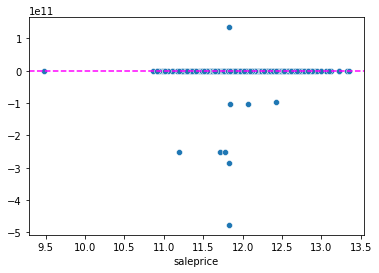

In [50]:
sns.scatterplot(x=y_test,y=pred_linear_model)
plt.axhline(y=0,color='magenta',linestyle='--')

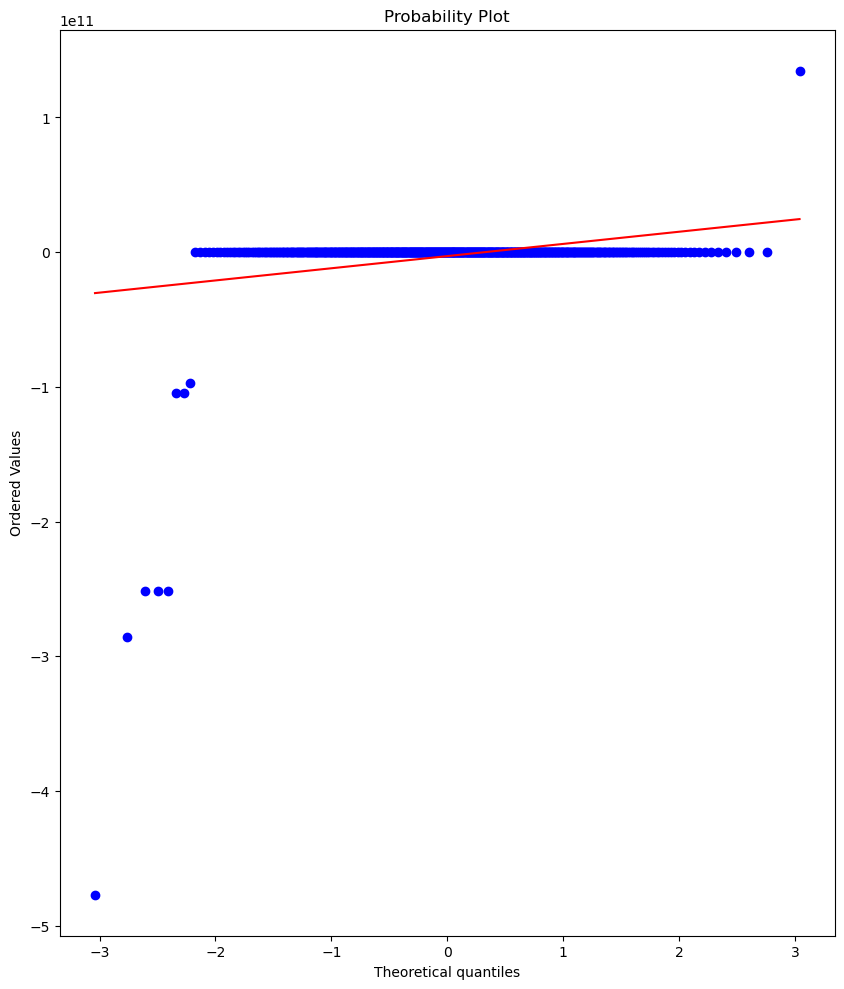

In [51]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_linear_model,plot=ax)

In [52]:
accuracy3= round(r2_score(y_test, pred_linear_model), 2)
accuracy3= accuracy3 * 100
accuracy3

-5.405452287554689e+23

# Grid search with elastic cv

In [53]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
#base_elastic_model = ElasticNet(max_iter=250000)
base_elastic_model = ElasticNet()

In [55]:
param_grid = {'alpha':[0.1,1,10,50,100],'l1_ratio':[0.1,0.5,0.7,0.9,1]}

In [56]:
#grid_model = GridSearchCV(estimator=base_elastic_model,param_grid=param_grid,scoring='neg_mean_squared_error',cv=10,verbose=2)
grid_model = GridSearchCV(estimator=base_elastic_model,param_grid=param_grid,scoring='neg_mean_squared_error',cv=10,verbose=2)

In [57]:
grid_model.fit(X_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] 

[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] .

[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] a

[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    4.0s finished


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [58]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [59]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [60]:
y_pred = grid_model.predict(X_test)

In [61]:
mean_squared_error(y_test,y_pred)

0.015242313929601027

In [62]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

0.12345976644073577

In [63]:
test_prob = y_test - y_pred

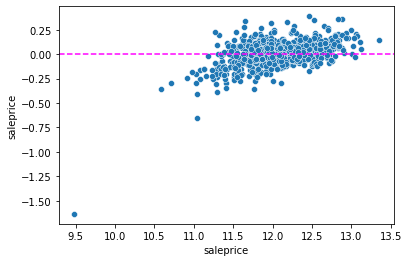

In [64]:
sns.scatterplot(x=y_test,y=test_prob)
plt.axhline(y=0,color='magenta',linestyle='--')

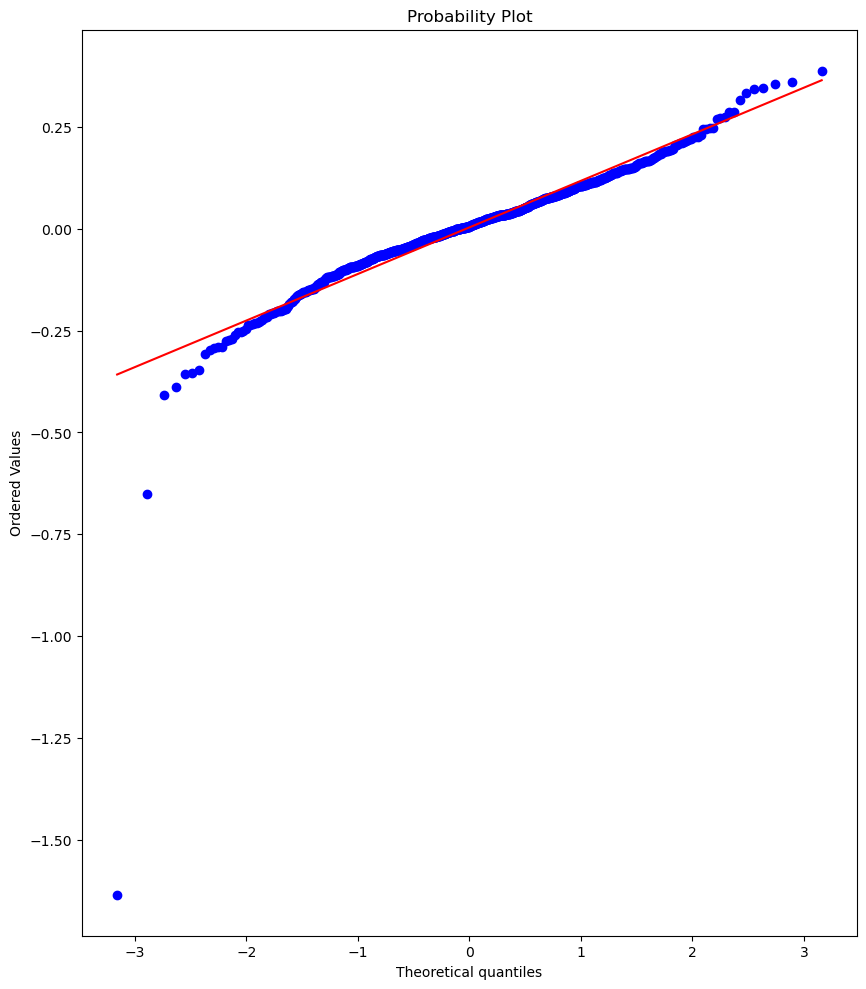

In [65]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(test_prob,plot=ax)

In [66]:
def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape

In [67]:
LR_MAPEgrid= MAPE(y_test,y_pred)

In [68]:
print("MAPE: ",LR_MAPEgrid)

MAPE:  0.7074879503548946


In [69]:
accuracy4= round(r2_score(y_test, y_pred), 2)
accuracy4= accuracy4 * 100
accuracy4

91.0

# Ridge model

In [70]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
ridge_model = Ridge(alpha=10)

In [72]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [73]:
pred_test_ridge = ridge_model.predict(X_test)

In [74]:
pred_test_ridge

array([11.97279465, 11.3500659 , 11.6451732 , 11.81201111, 12.41861922,
       12.38324205, 11.81745945, 11.88359368, 12.16830346, 12.16700584,
       12.08950124, 12.36377242, 12.491732  , 11.85119006, 11.67473984,
       11.68066659, 11.35833325, 12.07542195, 11.62701831, 11.97608787,
       11.83822769, 11.76413972, 12.48811706, 11.76081542, 11.59261682,
       12.01389516, 12.21073968, 12.45677273, 11.8576499 , 11.75758334,
       11.9983118 , 11.62529161, 12.15107113, 12.12953471, 11.53537848,
       12.96666064, 12.20954968, 11.91728445, 12.41202067, 12.08875512,
       11.50272608, 12.2124837 , 11.5942897 , 11.6717575 , 12.53936577,
       12.67567805, 12.63861492, 10.57886664, 11.99679796, 11.58376958,
       12.65181009, 12.16557405, 12.10217867, 11.6749422 , 12.03897777,
       11.76289315, 11.75836715, 11.94380702, 12.21699669, 11.83735643,
       12.53957799, 12.51255327, 11.0427825 , 11.1414464 , 11.83987814,
       11.45459617, 11.85372222, 11.94998969, 11.32350839, 12.26

In [75]:
MAE_ridge = mean_absolute_error(y_test,pred_test_ridge)
MSE_ridge = mean_squared_error(y_test,pred_test_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)

In [76]:
MAE_ridge

0.081384286010876

In [77]:
MSE_ridge

0.01575965706293103

In [78]:
RMSE_ridge

0.12553747274392227

In [79]:
def MAPE(y_test,pred_test_ridge):
    mape = np.mean(np.abs((y_test - pred_test_ridge)/y_test))*100
    return mape

In [80]:
LR_MAPEridge= MAPE(y_test,pred_test_ridge)

In [81]:
print("MAPE: ",LR_MAPEridge)

MAPE:  0.6824495266378408


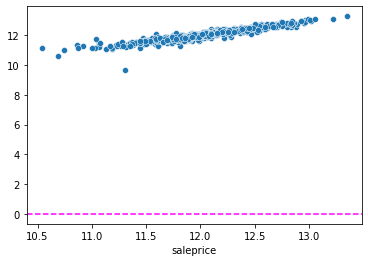

In [82]:
sns.scatterplot(x=y_test,y=pred_test_ridge)
plt.axhline(y=0,color='magenta',linestyle='--')

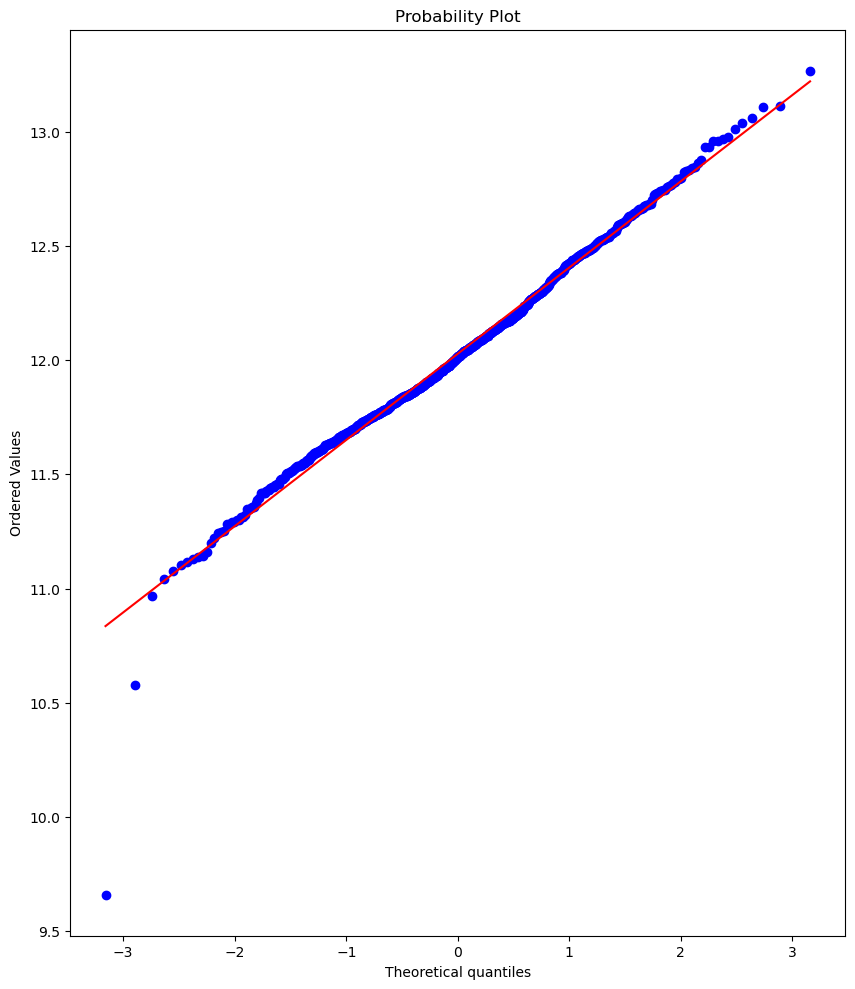

In [83]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_test_ridge,plot=ax)

In [84]:
accuracy5= round(r2_score(y_test, pred_test_ridge), 2)
accuracy5= accuracy5 * 100
accuracy5

89.0

# elastic model

In [85]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
elastic_model = ElasticNet()

In [87]:
elastic_model.fit(X_train,y_train)

ElasticNet()

In [88]:
pred_test_elastic = elastic_model.predict(X_test)

In [89]:
pred_test_elastic

array([12.0134526, 12.0134526, 12.0134526, 12.0134526, 12.0134526,
       12.0134526, 12.0134526, 12.0134526, 12.0134526, 12.0134526,
       12.0134526, 12.0134526, 12.0134526, 12.0134526, 12.0134526,
       12.0134526, 12.0134526, 12.0134526, 12.0134526, 12.0134526,
       12.0134526, 12.0134526, 12.0134526, 12.0134526, 12.0134526,
       12.0134526, 12.0134526, 12.0134526, 12.0134526, 12.0134526,
       12.0134526, 12.0134526, 12.0134526, 12.0134526, 12.0134526,
       12.0134526, 12.0134526, 12.0134526, 12.0134526, 12.0134526,
       12.0134526, 12.0134526, 12.0134526, 12.0134526, 12.0134526,
       12.0134526, 12.0134526, 12.0134526, 12.0134526, 12.0134526,
       12.0134526, 12.0134526, 12.0134526, 12.0134526, 12.0134526,
       12.0134526, 12.0134526, 12.0134526, 12.0134526, 12.0134526,
       12.0134526, 12.0134526, 12.0134526, 12.0134526, 12.0134526,
       12.0134526, 12.0134526, 12.0134526, 12.0134526, 12.0134526,
       12.0134526, 12.0134526, 12.0134526, 12.0134526, 12.0134

In [90]:
MAE_elastic = mean_absolute_error(y_test,pred_test_elastic)
MSE_elastic = mean_squared_error(y_test,pred_test_elastic)
RMSE_elastic = np.sqrt(MSE_ridge)

In [91]:
MAE_elastic

0.3272573538682835

In [92]:
MSE_elastic

0.1810016868694368

In [93]:
RMSE_elastic

0.12553747274392227

In [94]:
def MAPE(y_test,pred_test_elastic):
    mape = np.mean(np.abs((y_test - pred_test_elastic)/y_test))*100
    return mape

In [95]:
LR_MAPEelastic= MAPE(y_test,pred_test_elastic)

In [96]:
print("MAPE: ",LR_MAPEelastic)

MAPE:  2.721873496477578


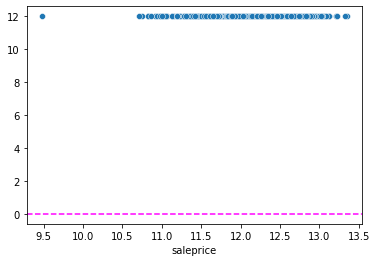

In [97]:
sns.scatterplot(x=y_test,y=pred_test_elastic)
plt.axhline(y=0,color='magenta',linestyle='--')

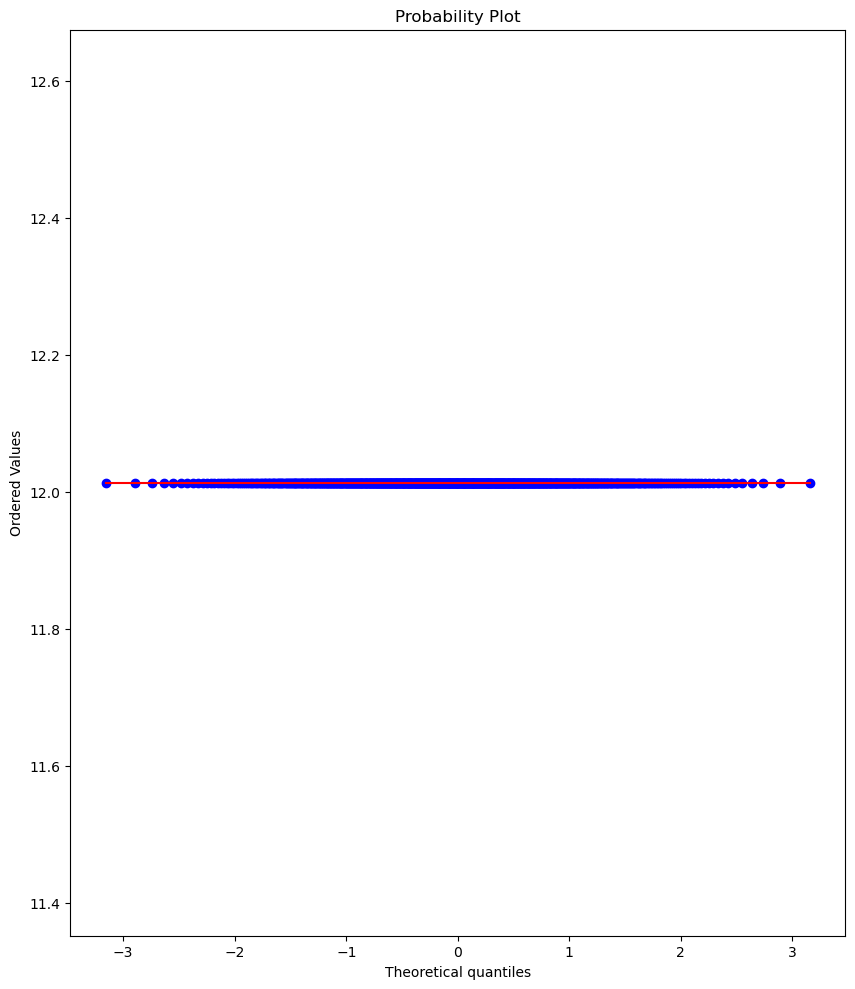

In [98]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_test_elastic,plot=ax)

In [99]:
accuracy6= round(r2_score(y_test, pred_test_elastic), 2)
accuracy6= accuracy6 * 100
accuracy6

-0.0

# ridge cv

In [100]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
ridgecv_model = RidgeCV()

In [102]:
ridgecv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [103]:
pred_test_ridgecv = ridgecv_model.predict(X_test)

In [104]:
pred_test_ridgecv

array([11.92269815, 11.64546708, 11.73057099, 12.41816971, 10.93698792,
       11.57618003, 11.94562497, 12.14243751, 11.81834963, 12.14163478,
       12.29934816, 11.76083277, 12.758253  , 12.47137806, 11.93459842,
       12.71466316, 11.68735107, 12.59027171, 12.28886212, 11.92519662,
       12.51866665, 11.49433263, 12.25842971, 11.97148579, 11.72396165,
       12.54354157, 12.02895336, 12.46347227, 12.30409876, 12.06783163,
       11.48251058, 11.87488343, 11.83389066, 12.7910641 , 11.67275297,
       12.37197718, 12.01481245, 11.34325668, 11.77317391, 12.06875285,
       11.85203649, 12.28938246, 10.87242855, 13.0510938 , 12.11252138,
       11.79190944, 11.91283887, 11.73565181, 12.2753994 , 12.8299113 ,
       12.91789175, 12.59400263, 11.89555311, 11.72876357, 12.46694157,
       11.8444038 , 11.55697933, 11.84620749, 12.10868335, 12.07522642,
       12.45458455, 12.22839357, 12.606535  , 11.9862066 , 12.58548502,
       12.29214521, 12.26132975, 11.96793157, 11.56689738, 11.52

In [105]:
MAE_ridgecv = mean_absolute_error(y_test,pred_test_ridgecv)
MSE_ridgecv = mean_squared_error(y_test,pred_test_ridgecv)
RMSE_ridgecv = np.sqrt(MSE_ridge)

In [106]:
MAE_ridgecv

0.07945716714455307

In [107]:
MSE_ridgecv 

0.012876194021264468

In [108]:
RMSE_ridgecv 

0.12553747274392227

In [109]:
def MAPE(y_test,pred_test_ridgecv):
    mape = np.mean(np.abs((y_test - pred_test_elastic)/y_test))*100
    return mape

In [110]:
LR_MAPEridgecv= MAPE(y_test,pred_test_ridgecv)

In [111]:
print("MAPE: ",LR_MAPEridgecv)

MAPE:  2.5605779815934495


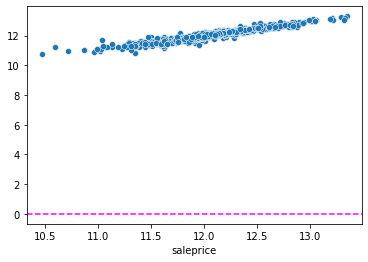

In [112]:
sns.scatterplot(x=y_test,y=pred_test_ridgecv)
plt.axhline(y=0,color='magenta',linestyle='--')

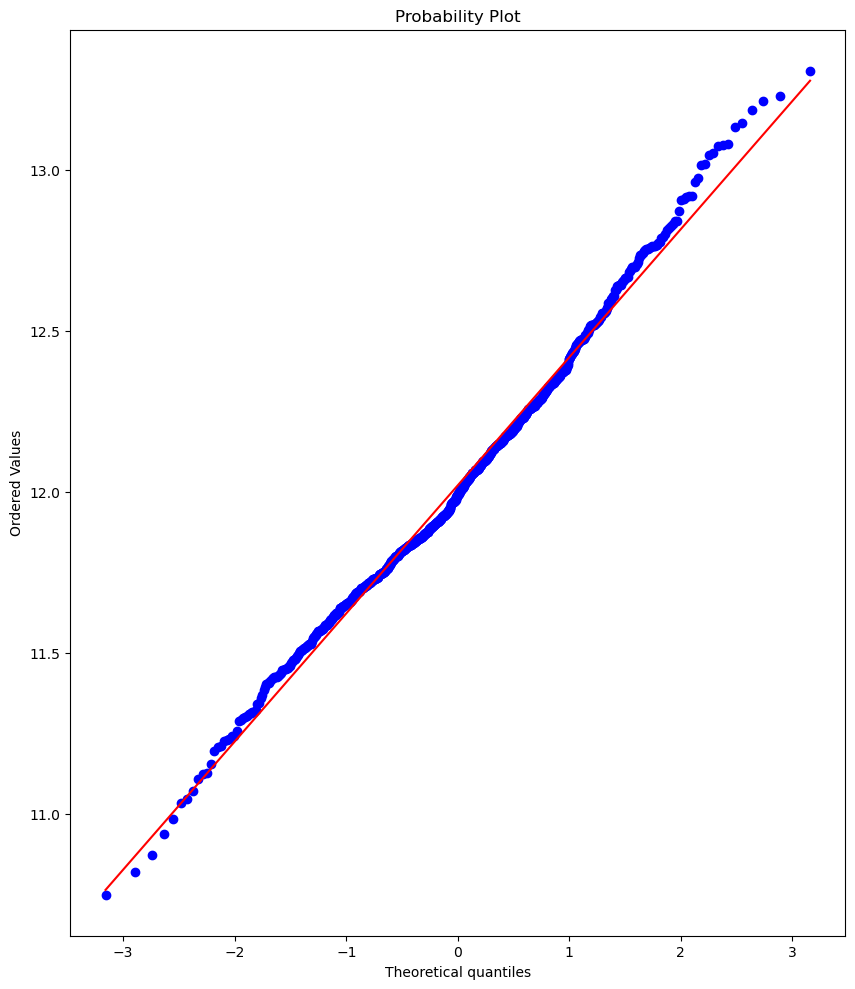

In [113]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_test_ridgecv,plot=ax)

In [114]:
accuracy7= round(r2_score(y_test, pred_test_ridgecv), 2)
accuracy7= accuracy7 * 100
accuracy7

92.0

In [115]:
print("lasso: ",LR_MAPElasso, "accuracy: ",accuracy1)

lasso:  2.6684416799011013 accuracy:  -0.0


In [116]:
print("lasso cv: \t",LR_MAPElassocv, "accuracy: ",accuracy2)

lasso cv: 	 0.6487279177309184 accuracy:  93.0


In [117]:
print("Linear regression\t",LR_MAPE, "accuracy: ",accuracy3)


Linear regression	 28497768113.488354 accuracy:  -5.405452287554689e+23


In [118]:
print("Gridcv with elastic :\t",LR_MAPEgrid, "accuracy: ",accuracy4)


Gridcv with elastic :	 0.7074879503548946 accuracy:  91.0


In [119]:
print("ridge :\t",LR_MAPEridge, "accuracy: ",accuracy5)


ridge :	 0.6824495266378408 accuracy:  89.0


In [120]:
print("elastic :\t",LR_MAPEelastic, "accuracy: ",accuracy6)


elastic :	 2.721873496477578 accuracy:  -0.0


In [121]:
print("ridge cv: \t",LR_MAPEridgecv, "accuracy: ",accuracy7)

ridge cv: 	 2.5605779815934495 accuracy:  92.0
